In [17]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud
from collections import Counter

In [22]:
data_fake=pd.read_csv('Fake.csv')
data_true=pd.read_csv('True.csv')

In [23]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [24]:
data_true.tail()

,title,text,subject,date
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [25]:
data_fake["class"]=0
data_true['class']=1

In [26]:
data_fake.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [27]:
data_merge=pd.concat([data_fake, data_true], axis = 0)
data_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [28]:
data_merge.columns
data=data_merge.drop(['title','subject','date'], axis = 1)

In [29]:
df = data.sample(frac = 1)

In [30]:
df.head()

,text,class
2908,Sean Spicer got off to a bit of a rocky start ...,0
8275,WASHINGTON (Reuters) - A close ally of Donald ...,1
6239,WASHINGTON (Reuters) - President Barack Obama ...,1
12771,DUBLIN (Reuters) - The Brexit transition perio...,1
10010,ABOARD AIR FORCE ONE (Reuters) - U.S. Presiden...,1


In [31]:
df.reset_index(inplace = True)
df.drop(['index'], axis = 1, inplace = True)

In [32]:
df.columns

Index(['text', 'class'], dtype='object')

In [33]:
print("Dataset Overview:")
display(df.head())
print("\nDataset Info:")
df.info()
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Overview:


,text,class
0,Sean Spicer got off to a bit of a rocky start ...,0
1,WASHINGTON (Reuters) - A close ally of Donald ...,1
2,WASHINGTON (Reuters) - President Barack Obama ...,1
3,DUBLIN (Reuters) - The Brexit transition perio...,1
4,ABOARD AIR FORCE ONE (Reuters) - U.S. Presiden...,1



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44898 non-null  object
 1   class   44898 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 701.7+ KB

Missing Values:
text     0
class    0
dtype: int64


C:\Users\matyi\AppData\Local\Temp\ipykernel_20840\2567065051.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette='viridis')


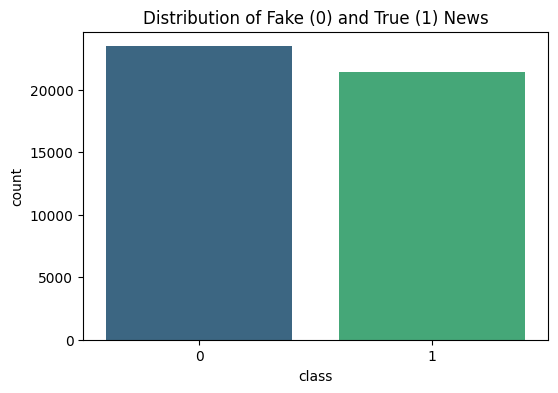

In [34]:
plt.figure(figsize=(6,4))
sns.countplot(x='class', data=df, palette='viridis')
plt.title('Distribution of Fake (0) and True (1) News')
plt.show()

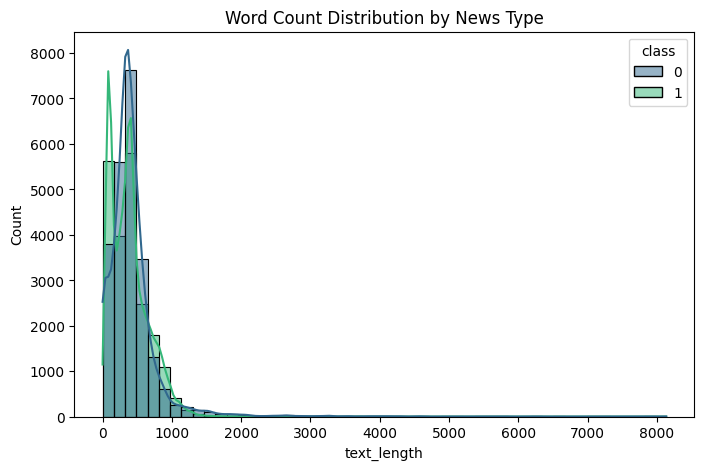

In [35]:
df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(8,5))
sns.histplot(df, x='text_length', hue='class', bins=50, kde=True, palette='viridis')
plt.title('Word Count Distribution by News Type')
plt.show()

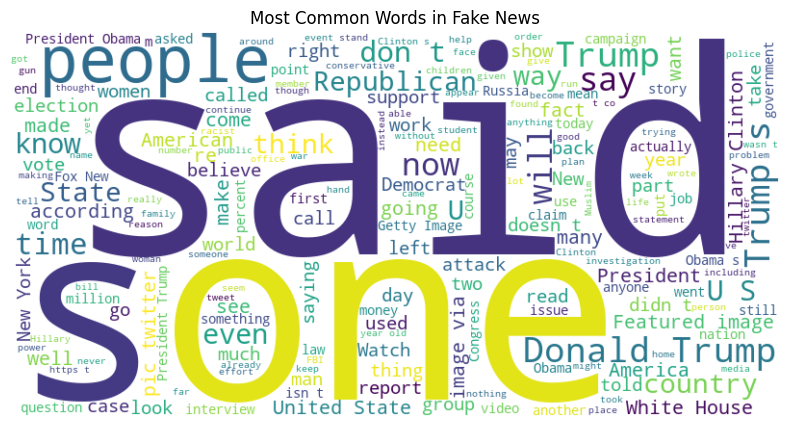

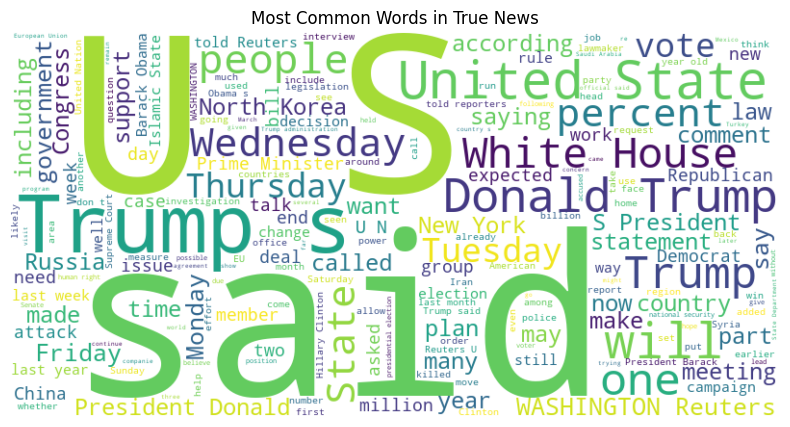

In [36]:
from collections import Counter
from wordcloud import WordCloud

def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(text))
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

fake_text = df[df['class'] == 0]['text'].dropna().tolist()
true_text = df[df['class'] == 1]['text'].dropna().tolist()

plot_wordcloud(fake_text, 'Most Common Words in Fake News')
plot_wordcloud(true_text, 'Most Common Words in True News')

In [37]:
print("\nBasic Statistics of Word Count:")
print(df.groupby('class')['text_length'].describe())


Basic Statistics of Word Count:
         count        mean         std  min    25%    50%    75%     max
class                                                                   
0      23481.0  423.197905  408.388890  0.0  240.0  363.0  506.0  8135.0
1      21417.0  385.640099  274.006204  0.0  148.0  359.0  525.0  5172.0


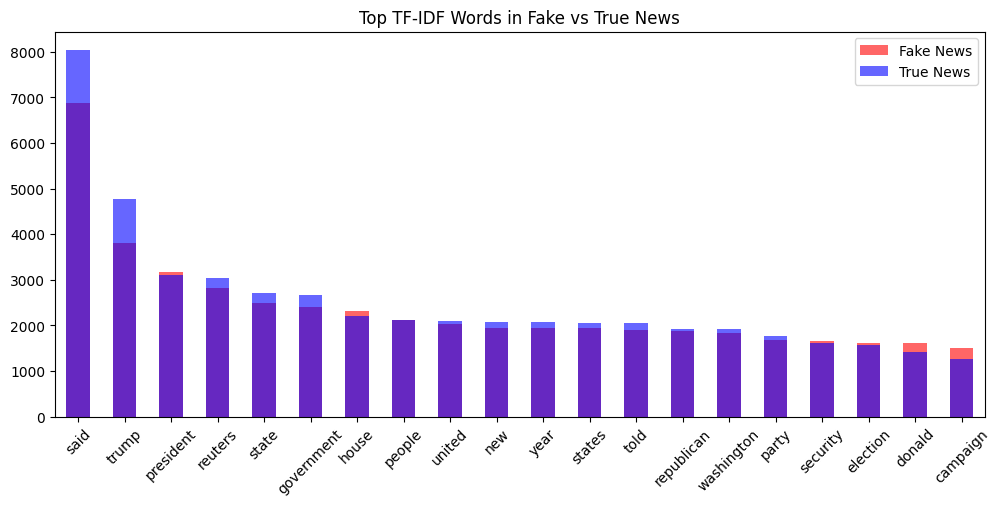

In [38]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=20)
X_fake = vectorizer.fit_transform(df[df['class'] == 0]['text'].dropna())
X_true = vectorizer.fit_transform(df[df['class'] == 1]['text'].dropna())

fake_tfidf_df = pd.DataFrame(X_fake.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)
true_tfidf_df = pd.DataFrame(X_true.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)

plt.figure(figsize=(12,5))
fake_tfidf_df.plot(kind='bar', color='red', alpha=0.6, label='Fake News')
true_tfidf_df.plot(kind='bar', color='blue', alpha=0.6, label='True News')
plt.legend()
plt.title("Top TF-IDF Words in Fake vs True News")
plt.xticks(rotation=45)
plt.show()

In [39]:
def get_top_ngrams(corpus, n=None, ngram_range=(2,2)):
    vec = CountVectorizer(stop_words='english', ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)    
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

fake_bigrams = get_top_ngrams(df[df['class'] == 0]['text'].dropna(), n=10)
true_bigrams = get_top_ngrams(df[df['class'] == 1]['text'].dropna(), n=10)

print("Top Bigrams in Fake News:")
print(fake_bigrams)
print("\nTop Bigrams in True News:")
print(true_bigrams)

Top Bigrams in Fake News:
[('donald trump', np.int64(16288)), ('featured image', np.int64(7692)), ('hillary clinton', np.int64(7278)), ('white house', np.int64(6743)), ('united states', np.int64(6663)), ('twitter com', np.int64(6567)), ('pic twitter', np.int64(6195)), ('new york', np.int64(4352)), ('president obama', np.int64(4081)), ('getty images', np.int64(4022))]

Top Bigrams in True News:
[('united states', np.int64(12204)), ('donald trump', np.int64(10168)), ('white house', np.int64(8419)), ('washington reuters', np.int64(6674)), ('president donald', np.int64(5930)), ('north korea', np.int64(5659)), ('new york', np.int64(4740)), ('prime minister', np.int64(4163)), ('said statement', np.int64(3933)), ('trump said', np.int64(3551))]
